# 5. Data visualization with matplotlib and seaborn


This notebook will review:
- Basic components of a Matplotlib plot.
- []
- []

---

For this tutorial we are going to use the wine dataset also used in [notebook 3](./03-pipelines.ipynb):

In [1]:
from sklearn.datasets import load_wine

# Load dataset into dataframe
dataset = load_wine(as_frame=True)["frame"]
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Matplotlib

[Matplotlib](https://matplotlib.org/) is the most well-known and used visualization package in Python.
You can use matplotlib to create static, animated, and interactive plots.


## Figure and axes

Plots in _matplotlib_ are composed of Figure and Axes. A __figure__ is the final image, which can contain more than one plot. We refer to the plots contained inside a figure as __Axes__. Do not confuse axes with the __axis__ (x, y) of a figure! 

The following figure taken from the matplotlib tutorial ["Parts of a figure"](https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure) illustrates these components:

![](../images/matplotlib_parts_figure.png)


We can create a figure and Axes by calling `subplots` (read the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) in the following manner:

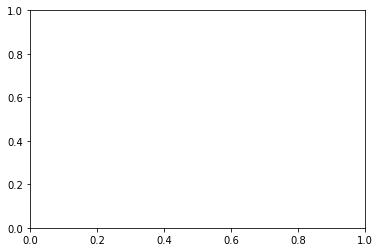

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Let's inspect `fig` and `ax`:

In [3]:
print(fig)
print(ax)

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


`subplot` also allows us to create a Figure with mutliple Axes, and define how these should spread across rows (using parameter `nrows`) and columns (using parameter `ncols`). We can also specify the size of our figure in inches, using the parameter `figsize`: 

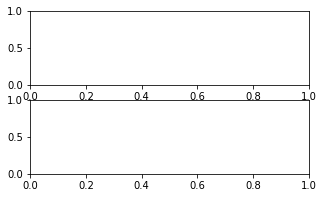

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 3))

Now that we have two Axes, what does `ax` represent?

In [5]:
print(ax)

[<AxesSubplot:> <AxesSubplot:>]


`ax` is now an array containing two axes objects. This means we can also call `subplots` in the following manner:

`fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)`.

#### ✍️ Exercise

Can you create a Figure with 2 Axes, one per column, specifying the plot to be 5x5 inches?

Write your answer in the cell below, and press the three dots to reveal the solution.

In [ ]:
# Answer
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

## The components of Axes

The Axes contains the most important figure elements:
- The __axis__ that define the data limits of the plot (set via `set_axis()`)
- The __title__ (set via `set_title()`)
- The __x and y labels__ (set via `set_xlabel()` and `set_ylabel()`). 
- The __x and y ticks__ (set via `set_xticks()`)
- The __x and y tick labels__ (set via `set_xticklabels()`)

The following illustration taken from the [Matplotlib faq](https://matplotlib.org/2.0.2/faq/usage_faq.html) sketches these and other important components:

<figure>
  <img src="../images/matplotlib_anatomy_figure.png" alt="kfoldcv" width="600"/>
</figure>

Let's now show how you can set modify some of this components using a specific example of our wine dataset.

## Inspecting the dataset

One common data visualization step during machine learning analysis is to visually inspect the correlation between the features and the outcome variable, or between the features themselves.

### Feature correlation

Let's select two features of our dataset, alcohol and malic acid, and visualize how their values relate to each other using a [__scatterplot__](https://en.wikipedia.org/wiki/Scatter_plot#). 

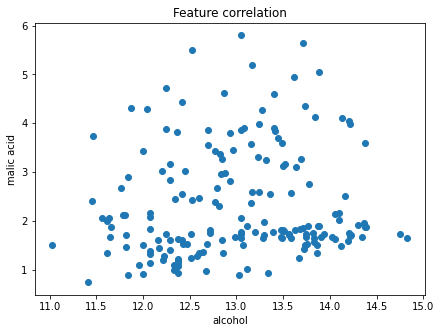

In [12]:
# Define features to be plotted
alcohol = dataset["alcohol"]
malic_acid = dataset["malic_acid"]

# Create and show scatterplot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(alcohol, malic_acid)
ax.set_xlabel("alcohol")
ax.set_ylabel("malic acid")
ax.set_title("Feature correlation")
plt.show()

As you can see from the code above, plots are made on top of Axes by running `ax.{my_type_of_plot}`. The Axes are also used to set most of the other elements of a plot. For example, we can use `ax.set_xlabel` to determine the label in the x-axis, or `ax.set_title` to add a title to the figure.

#### ✍️ Exercise

We can customize our plot in many different ways. Read the documentation of `scatter` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and change the code above so that the samples are plotted in red instead of blue. Try also changing the transparency of the dots (hint: you can use the argument `alpha` for this). 

Write your answer in the cell below, and press the three dots to reveal the solution.

In [ ]:
# Answer
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(alcohol, malic_acid, c="red", alpha=.2)
ax.set_xlabel("alcohol")
ax.set_ylabel("malic acid")
ax.set_title("Feature correlation")
plt.show()

### Class distribution per feature

We can also explore the relationship between our outcome variable and each feature. In the wine dataset, the outcome variable is discrete (a classification problem) so using a scatterplot wouldn't be the right option to illustrate this relationship. A more suitable possibility would be to use [__boxplots__](https://en.wikipedia.org/wiki/Box_plot).

In Matplotlib, boxplots can be created by calling `boxplot`. If you read its documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) you will notice this function takes as input an array or a sequence of vectors. In our wine example, we thus need to create a list of arrays where each array contains the values of our feature (e.g. `alcohol`) per class. Let's create this list:

In [13]:
# Create list of alcohol values per class
alcohol_by_class = [
    dataset.loc[dataset["target"]==c]["alcohol"].values for c in set(dataset["target"])
]

Let's plot the data:

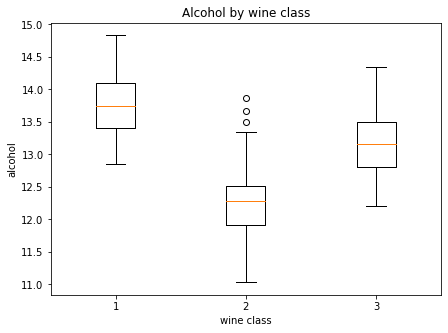

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)
ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

There seems to be a difference in the alcohol content of the different types of wine classes. 

In our plot, the labels assigned to the outcome variable are not very informative. Unfortunately, in this dataset we don't know which types of wine each number represents. For illustration purposes, we will invent the mapping of such labels:

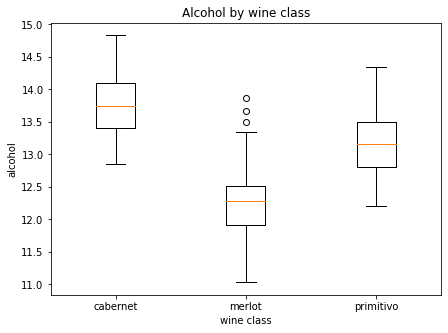

In [22]:
# Invent mapping of class labels
classes_names = ["cabernet", "merlot", "primitivo"]

# Plot figure
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)

# Set x ticks labels
ax.set_xticklabels(classes_names) # set tick labels

ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

Let's now plot the relationship between all predictors and the labels. We can do this by creating multiple Axes in a single plot, and use a for loop to assign to each Axes a different plot:

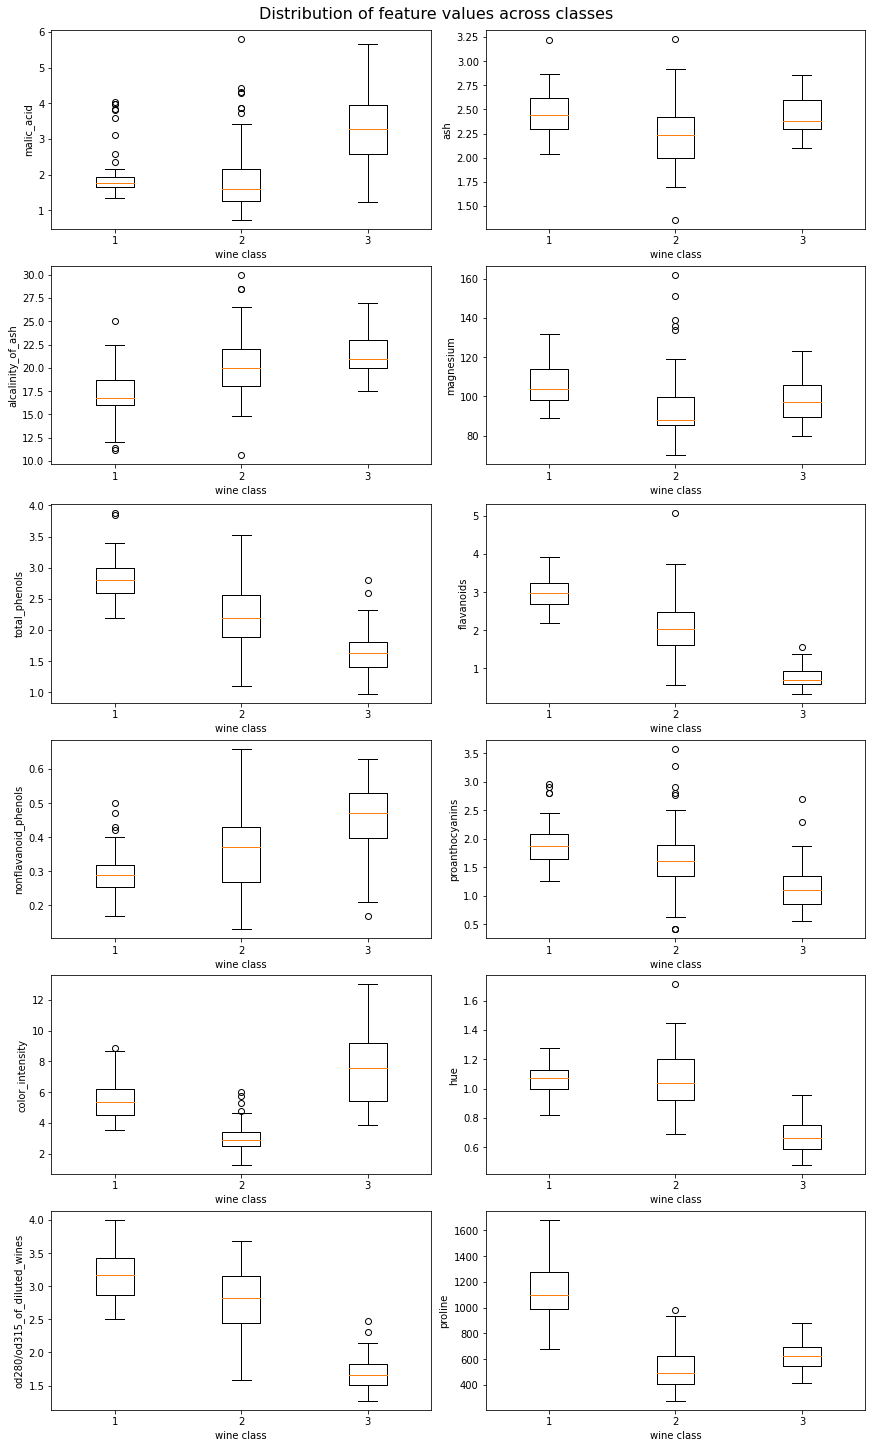

In [40]:
# Create list of feature names
feature_names = list(dataset.columns[1:-1].values)

# Define number of columns and rows
nrows = int(len(feature_names)/2)
ncols = 2

# Create figure
fig, axes = plt.subplots(nrows, ncols, figsize=(12,20), constrained_layout=True)
fig.suptitle("Distribution of feature values across classes", fontsize=16)

for idx, ax in enumerate(axes.flatten()):
    
    # Create list of feature values per class
    feature_by_class = [
        dataset.loc[dataset["target"]==c][feature_names[idx]].values for c in set(dataset["target"])
    ]
    
    # Create boxplot
    ax.boxplot(feature_by_class)
    
    # Set labels
    ax.set_xlabel("wine class")
    ax.set_ylabel(f"{feature_names[idx]}")

plt.show()

Notice that we can also add a general title to the figure by calling the function `suptitle()` over `fig`. We can also define the fontsize of this title. 

`fig.suptitle("Distribution of feature values across classes", fontsize=16)`

#### ✍️ Exercise

We can change the fontsize of any text in the plot. Can you recreate the boxplot showing the distribution of alcohol content across classes, and change its `x` and `y` labels to be of size 15? You can also change the `title` of the plot to be of size 20. 

Using the same figure, see what happens if you set `notch=True` in `boxplot`.

Write your answer in the cell below, and press the three dots to reveal the solution.

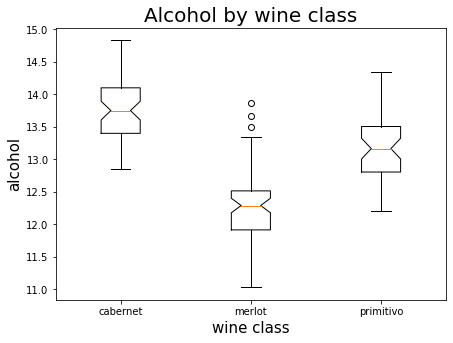

In [21]:
# Answer
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class, notch=True)
ax.set_xticklabels(classes_names) # set tick labels
ax.set_xlabel("wine class", fontsize=15)
ax.set_ylabel("alcohol", fontsize=15)
ax.set_title("Alcohol by wine class", fontsize=20)
plt.show()

# Seaborn

Going back to our features correlation example, what if besides plotting the observations we also wanted to visualise the regression line that best fits the data?

We could achieve this by calculating the line of best fit using any Python stats package (such as _statsmodel_), and then use `plot` in _matplotlib_ to visualize the result on top of the scatterplot. However, there is another great visualization package in Python that makes this extremely easy: [_seaborn_](https://seaborn.pydata.org/).

_Seaborn_ is a high-level plotting library that is built on top of Matplotlib. It is well known for its ability to create [complex plots](https://seaborn.pydata.org/examples/index.html) with a simple interface. It also nicely integrates with the _pandas_ library.

Let's see how easy is to plot a regression line of the relationship between our features using _seaborn_:

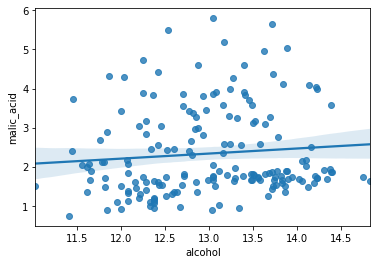

In [42]:
import seaborn as sns

# Plot
sns.regplot(x=alcohol, y=malic_acid)
plt.show()

Since our dataset is stored as a _pandas_ dataframe, we didn't even have to provide labels for our plot: _seaborn_ knows where to look for them in the dataframe.

We can also easily combine _Matplotlib_ and _seaborn_ functionality. Seaborn's usually have a parameter named `ax` where we can specify the Axes we want to plot on top of. If no ax is passed, seaborn plots over the current ax by default. Let's see an example of this integration, and modify the above plot with _Matplotlib_ to be bigger and have a title:

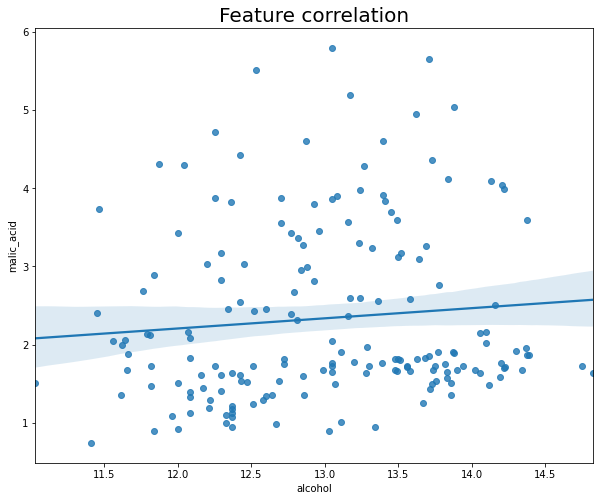

In [50]:
# Plot
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=alcohol, y=malic_acid, ax=ax)
ax.set_title("Feature correlation", fontsize=20)
plt.show()

#### ✍️ Exercise

[__Violinplots__](https://en.wikipedia.org/wiki/Violin_plot) can be more informative than boxplots. Can you read the documentation of `violinplot` [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) and use _seaborn_ to plot how alcohol content is distributed on each class of wine?

Write your answer in the cell below, and press the three dots to reveal the solution.

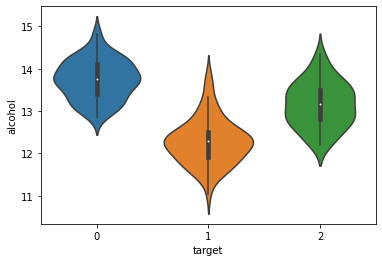

In [52]:
# Answer
sns.violinplot(x=dataset["target"], y=dataset["alcohol"])
plt.show()

# ✏️ Check your knowledge

Load the ABIDE 2 dataset and:

1. Subselect some features (ROIs) and plot their correlation. 
    - Check if ROIs from closer brain areas are more correlated than those farer apart.
2. Subselect some features (ROIs) and plot their distribution for each class. 
    - Do you observe some interesting pattern/s?


# Additional resources
- [Data Visualization in Python ](https://www.youtube.com/watch?v=uaKu5a6P3oU) _by Kirstie Whitaker_
- [Matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png) _by Matplotlib_
- [Parts of a figure](https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure) _by Matplotlib_
- [The lifecycle of a plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html) _by Matplotlib_